# Table of Contents
 <p>

In [1]:
import os

# general import for smrt
from smrt import make_snowpack, make_model, sensor

# import for memls
from smrt.utils import memls_legacy


import matplotlib.pyplot as plt
%matplotlib inline

Prepare the snowpack and the sensor

In [2]:
# prepare snowpack
pc=0.2e-3
snowpack = make_snowpack([10], "exponential",
                        density=[300], temperature=[265], corr_length=pc)

# create the sensor
theta = range(10, 80, 5)
radiometer = sensor.passive(37e9, theta)

Run SMRT with IBA + DORT

In [3]:
# create the EM Model
m = make_model("iba", "dort")

# run the model
sresult = m.run(radiometer, snowpack)

Run MEMLS matlab code

In [4]:
# set the path where memls matlab code is
mresult = memls_legacy.run(radiometer, snowpack)

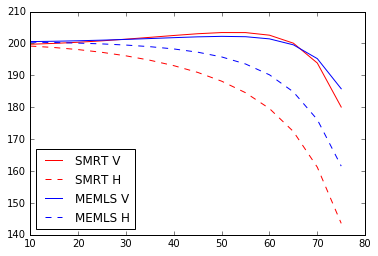

In [5]:
# outputs
# outputs
plt.plot(theta, sresult.TbV(), 'r-', label='SMRT V')
plt.plot(theta, sresult.TbH(), 'r--', label='SMRT H')
plt.plot(theta, mresult.TbV(), 'b-', label='MEMLS V')
plt.plot(theta, mresult.TbH(), 'b--', label='MEMLS H')
plt.legend(loc='best')